# Exploratory Data Analysis of Stimulus Triggered Averages
*Ian Malone*

### Load data and check structure

In [55]:
import pandas as pd

project = 'NEIL'

path = 'C:\\Users\\iangm\\Google Drive\\IanGMalone\\UF\\Lab\\DataAndFigures\\df_STA_%s_2020_12_14.csv' % project
df_sta = pd.read_csv(path)
df_sta.head()

Animal  Day  Side  Stim_Amplitude  Sample  STA_Amplitude
0    N01  D01  Left           100.0       0       0.017451
1    N01  D01  Left           100.0       1       0.016346
2    N01  D01  Left           100.0       2       0.015570
3    N01  D01  Left           100.0       3       0.018695
4    N01  D01  Left           100.0       4       0.024712

In [56]:
df_sta.dtypes

Animal             object
Day                object
Side               object
Stim_Amplitude    float64
Sample              int64
STA_Amplitude     float64
dtype: object

#### For this analysis, we will only keep the right side EMG for SPARC and left side EMG for Neilsen (for now)

In [57]:
if 'NEIL' in path: 
    df_sta = df_sta[df_sta["Side"] == 'Left']
else:
    df_sta = df_sta[df_sta["Side"] == 'Right']

In [58]:
# this corrects a typo in a file name... 
df_sta.loc[df_sta.Day == 'D13', 'Day'] = 'D14'

In [59]:
print(df_sta.Animal.unique())
print(df_sta.Day.unique())
print(df_sta.Side.unique())
print(df_sta.Stim_Amplitude.unique())

['N01' 'N04' 'N05' 'N09' 'N10' 'N11' 'N13' 'N14' 'N15' 'N16' 'N17' 'N19'
 'N20' 'N21' 'N22' 'N23' 'N24' 'N25' 'N26' 'N27' 'N28' 'N29' 'N30' 'N31'
 'N32' 'N33']
['D01' 'D02' 'D03' 'D04' 'D05' 'D06' 'P04' 'P05' 'P06' 'P03' 'P01' 'P02']
['Left']
[ 100.  105.  200.  300.  305.  400.  405.  500.  505.  600.  605.  700.
  705.  800.  805.  900.  905. 1000. 1005. 1100. 1105. 1200. 1205. 1300.
 1305. 1400. 1405. 1500. 1505. 1600. 1605. 1700. 1705. 1800. 1805. 1900.
 1905. 2000. 2005. 2010. 2100. 2105. 2200. 2210. 2300. 2305. 2310. 2400.
 2405. 2410. 2500. 2510. 2515. 2600. 2610. 2700. 2710. 2715. 2800. 2810.
 2815. 2900. 2905. 2915. 3000. 3005. 3015. 3100. 3105. 3115. 3200. 3215.
 3300. 3305. 3315. 3400. 3405. 3415. 3500. 3515. 3600. 3615. 3700. 3715.
 3720. 3800. 3815. 3900. 3905. 3915. 4000. 4015. 4020. 4100. 4120.  205.
 2205. 2505. 2605. 2705. 2805. 3010. 3110. 3205. 3410. 3505. 3510. 3605.
 3610. 3705. 3710. 3805. 3810. 3910. 4005. 4010. 4110. 4200. 4205. 4210.
 4300. 4305. 4310. 4400. 44

In [60]:
df_sta.groupby(['Animal'])['Stim_Amplitude'].unique()

Animal
N01    [100.0, 105.0, 200.0, 300.0, 305.0, 400.0, 405...
N04    [100.0, 105.0, 200.0, 205.0, 300.0, 305.0, 400...
N05    [100.0, 105.0, 200.0, 300.0, 305.0, 400.0, 405...
N09    [100.0, 105.0, 200.0, 205.0, 300.0, 305.0, 400...
N10    [100.0, 105.0, 200.0, 205.0, 300.0, 305.0, 400...
N11    [100.0, 105.0, 200.0, 205.0, 300.0, 305.0, 400...
N13    [100.0, 150.0, 200.0, 250.0, 300.0, 350.0, 400...
N14    [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0]
N15    [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0]
N16    [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0]
N17    [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0]
N19    [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0]
N20    [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0]
N21    [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0]
N22    [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0]
N23    [100.0, 200.0, 300.0, 400.0, 500.0, 600.0, 700.0]
N24    [100.0, 110.0, 120.0, 130.0, 140.0, 150.0, 160...
N25    [100.0, 110.0, 12

In [61]:
df_sta[df_sta['Animal'] == 'N11']['Stim_Amplitude'].unique()
# df.value1 = df.value1.round()

array([ 100.,  105.,  200.,  205.,  300.,  305.,  400.,  405.,  500.,
        505.,  600.,  605.,  700.,  705.,  800.,  805.,  900., 1000.,
       1100., 1200., 1205., 1300., 1305., 1400., 1405., 1500., 1505.,
       1600., 1700., 1705., 1800., 1805., 1900., 2000., 2005., 2100.,
       2105., 2200., 2300., 2305., 2400., 2405., 2500., 2505., 2600.,
       2605., 2700., 2705., 2800., 2900., 3000., 3100., 3105., 3200.,
       3300., 3305., 3400., 3405., 3500., 3505., 3600., 3605., 3700.,
       3705., 3800., 3900., 3905., 4000., 4005., 4100., 4200., 4300.,
       4305., 4400., 4500., 4505., 4600., 4700., 4800., 4805., 4900.,
       5000., 5100., 5105., 5200., 5205., 5300., 1005., 1105., 1605.,
       1905., 2205., 2805., 2905., 3005., 3205., 3805., 4105., 4205.,
       4405., 4605., 4705., 4905., 5005.,  905., 5305., 5400., 5405.,
       5500., 5505., 5600., 5605., 5700., 5705., 5800., 5805., 5900.,
       5905., 6000., 6005., 6100., 6105., 6200., 6205., 6300., 6305.,
       6400., 6405.,

#### We will also change the 'Day' column to have integer values.

In [62]:
df_sta['Day'] = df_sta['Day'].str[-2:].astype(int)
df_sta.head(), df_sta.dtypes

(  Animal  Day  Side  Stim_Amplitude  Sample  STA_Amplitude
 0    N01    1  Left           100.0       0       0.017451
 1    N01    1  Left           100.0       1       0.016346
 2    N01    1  Left           100.0       2       0.015570
 3    N01    1  Left           100.0       3       0.018695
 4    N01    1  Left           100.0       4       0.024712,
 Animal             object
 Day                 int32
 Side               object
 Stim_Amplitude    float64
 Sample              int64
 STA_Amplitude     float64
 dtype: object)

### Plot stimulus triggered average waveforms
##### For each current amplitude, each animal, and each day
There is a lot of data here, so we will subset. Only plot waveforms of stimulation amplitudes divisible by 50 on odd numbered days. We also need to remove the stimulus artifact.

In [63]:
df_sta[df_sta['Animal'] == 'N01']['Stim_Amplitude'].min()

100.0

In [67]:
import numpy as np
high_v_list = ['N01', 'N04', 'N05', 'N09', 'N10', 'N11', 'N13' ]

if df_sta[df_sta['Animal'] == 'N01']['Stim_Amplitude'].min() == 100.0:
    df_sta['Stim_Amplitude'] = np.where(df_sta['Animal'].isin(high_v_list), df_sta['Stim_Amplitude'] / 10, df_sta['Stim_Amplitude'])
    df_sta['Stim_Amplitude'] = df_sta['Stim_Amplitude'].round()
else:
    print('Voltages already corrected.')
    
print(df_sta.Stim_Amplitude.unique())

Voltages already corrected.
[ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130. 140.
 150. 160. 170. 180. 190. 200. 201. 210. 220. 221. 230. 231. 240. 241.
 250. 251. 252. 260. 261. 270. 271. 272. 280. 281. 282. 290. 292. 300.
 302. 310. 312. 320. 322. 330. 332. 340. 342. 350. 352. 360. 362. 370.
 372. 380. 382. 390. 392. 400. 402. 410. 412. 301. 311. 341. 351. 361.
 371. 381. 391. 401. 411. 420. 421. 430. 431. 440. 441. 450. 490. 211.
 291. 321. 422. 432. 442. 452. 460. 470. 480. 500. 510. 520. 530. 540.
 550. 560. 570. 580. 590. 600. 610. 620. 630. 262. 462. 472. 482. 492.
 502. 512. 522. 532. 542. 552. 562. 572. 582. 592. 602. 612. 622. 632.
 640. 642. 650. 652. 660. 662. 670. 672. 680. 682. 690. 692. 700. 702.
 710. 712. 720. 722. 730. 732. 740. 742. 750. 752. 181. 191. 331. 451.
 461. 471. 481. 491. 501. 511. 521. 531. 541. 551. 581. 611. 621. 661.
 681. 691. 760. 762. 770. 772. 780. 782. 790. 792. 800. 802. 810. 811.
 812. 820. 822. 830. 832. 840. 842. 850. 852. 860

In [68]:
df_sta_sub = df_sta.copy()
df_sta_sub = df_sta_sub[(df_sta_sub["Stim_Amplitude"] % 100) == 0] # keep only stimulus amplitudes divisible by 50
"Unique stimulation amplitudes after subsetting are %s uA." % (df_sta_50.Stim_Amplitude.unique())

'Unique stimulation amplitudes after subsetting are [ 50. 100. 200. 300. 400. 500. 600. 700. 150. 250. 350. 450. 550. 650.] uA.'

In [19]:
sampling_frequency = 5000 # hertz
df_sta_50['Time'] = df_sta_50['Sample']/sampling_frequency # create time column based on samples and sampling frequency
df_sta_50['Time'] = df_sta_50['Time']*1000
df_sta_50.head()

Animal  Day  Side  Stim_Amplitude  Sample  STA_Amplitude  Time
103050    N04    1  Left            50.0       0       1.686951   0.0
103051    N04    1  Left            50.0       1       1.109476   0.2
103052    N04    1  Left            50.0       2       0.908202   0.4
103053    N04    1  Left            50.0       3       1.644006   0.6
103054    N04    1  Left            50.0       4       1.216584   0.8

# This is ad hoc change... needs to be coded into the script using low_amp_list

###### The plot below is the raw STA data before any processing

<Figure size 1440x864 with 0 Axes>

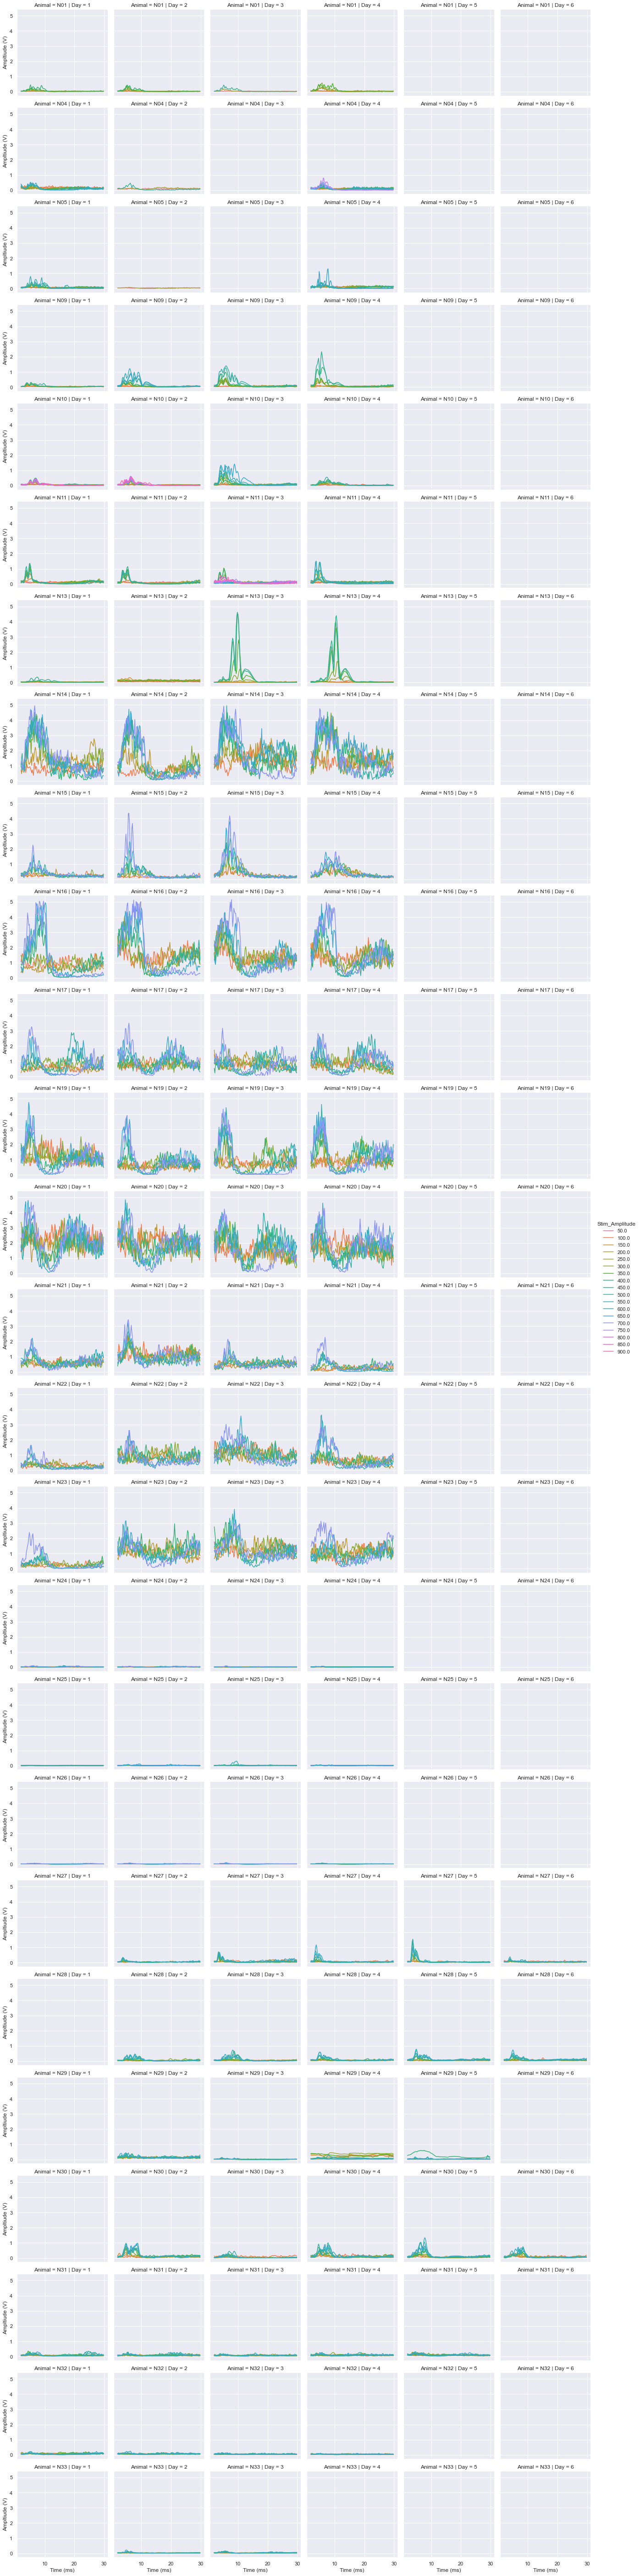

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=1)
plt.figure(figsize=(20,12))

g = sns.FacetGrid(df_sta_50, col='Day', row='Animal', hue='Stim_Amplitude')
g.map_dataframe(sns.lineplot, x='Time', y='STA_Amplitude')
g.set_axis_labels('Time (ms)', 'Ampltiude (V)')
g.add_legend()
plt.savefig('C:\\Users\\Ian\\Downloads\\saving-a-seaborn-plot-as-pdf-file.pdf')


TypeError: savefig() takes 2 positional arguments but 3 were given

<Figure size 432x288 with 0 Axes>

###### These traces need to be normalized so they can be compared. This step should be given a lot of thought as normalization schemes can dramatically influence your model. The stimulus artifact must also be removed so it does not affect the normalization.

As a first pass, we will use a min/max scaler. Take all days for each animal and rescale the STAs such that all values are between 0 and 1

In [13]:
# remove the stimulus artifact by deleting samples 0 to 9
df_sta = df_sta[df_sta['Sample'] >= 10]
df_sta_50 = df_sta_50[df_sta_50['Sample'] >= 10]

# scale STA values to be within the range [0,1]
from sklearn.preprocessing import minmax_scale

STA_Scaled = df_sta.groupby(['Animal', 'Side'])['STA_Amplitude'].transform(lambda x: minmax_scale(x.astype(float)))
df_sta_norm = df_sta.copy()
df_sta_norm['STA_Scaled'] = df_sta_norm.index.map(STA_Scaled)
df_sta_norm = df_sta_norm.drop(['STA_Amplitude'], axis=1).reset_index(drop=True)

STA_Scaled_50 = df_sta_50.groupby(['Animal', 'Side'])['STA_Amplitude'].transform(lambda x: minmax_scale(x.astype(float)))
df_sta_50_norm = df_sta_50.copy()
df_sta_50_norm['STA_Scaled'] = df_sta_50_norm.index.map(STA_Scaled_50)
df_sta_50_norm = df_sta_50_norm.drop(['STA_Amplitude'], axis=1).reset_index(drop=True)

###### The plot below shows the normalized STAs with stimulus artifact removed

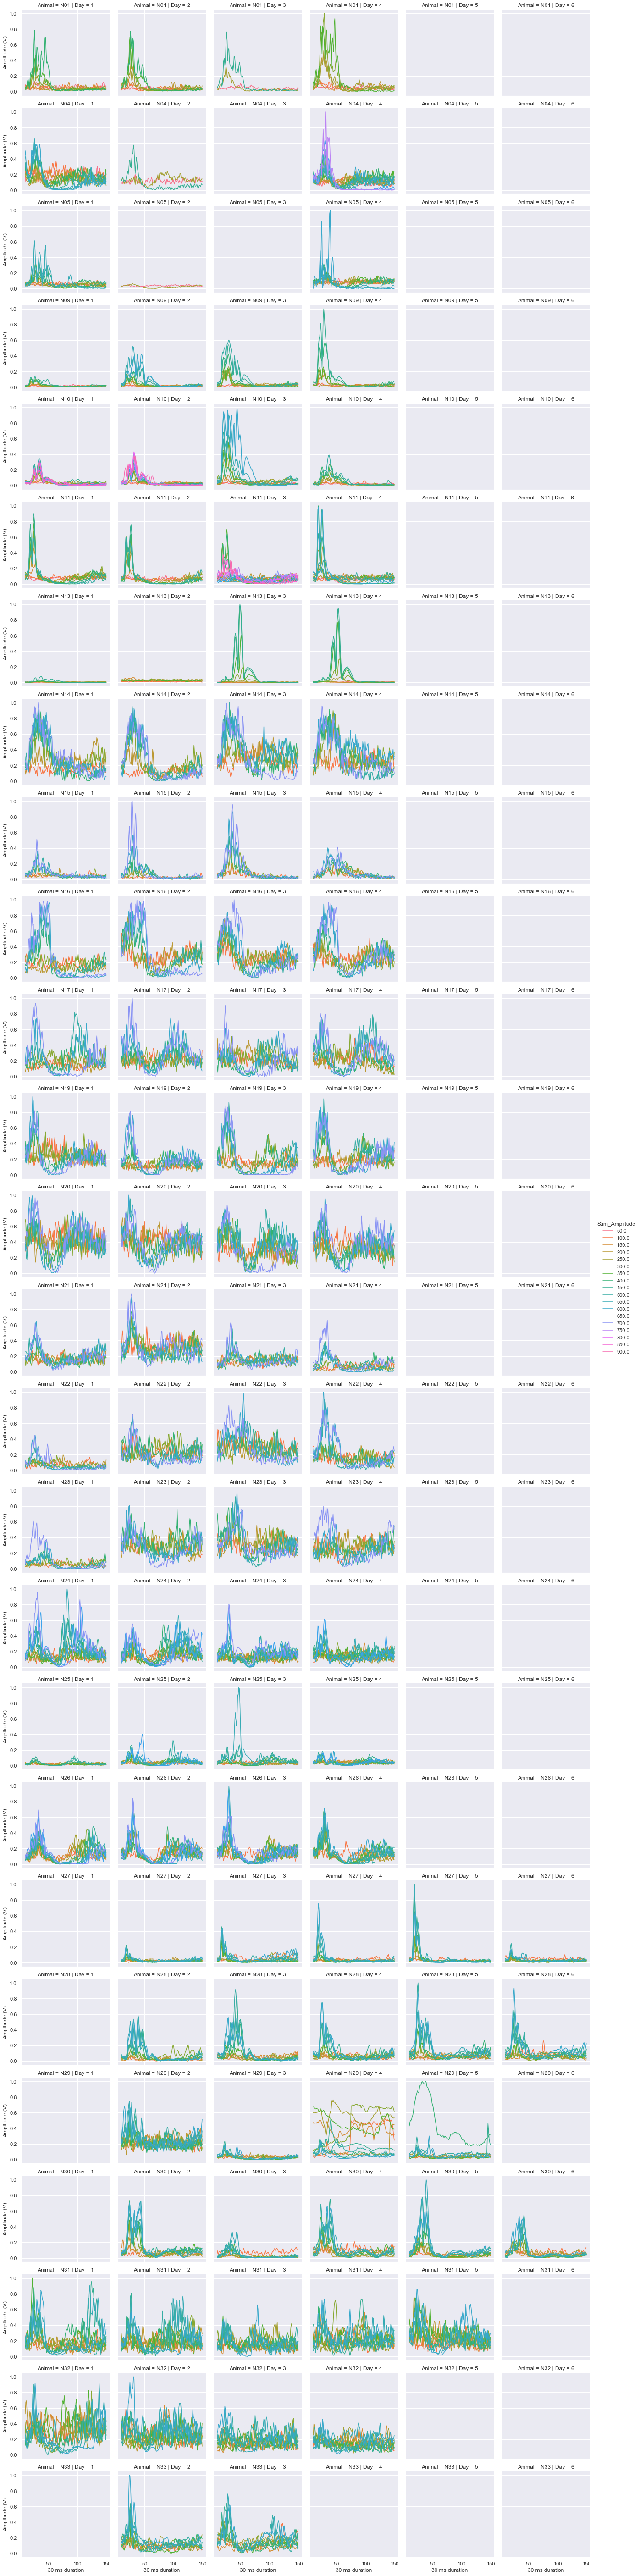

In [15]:
g = sns.FacetGrid(df_sta_50_norm, col='Day', row='Animal', hue='Stim_Amplitude')
g.map_dataframe(sns.lineplot, x='Sample', y='STA_Scaled')
g.set_axis_labels('30 ms duration', 'Ampltiude (V)')
g.add_legend()
plt.savefig('C:\\Users\\Ian\\Downloads\\STA_plots_norm_no_artifact.pdf')


### Calculate area under the stimulus triggered average curves 
##### For each current amplitude, each animal, and each day

In [179]:
df_sta_50_norm.head()

Animal  Day   Side  Stim_Amplitude  Sample  STA_Scaled
0    S01    4  Right           100.0      10    0.049637
1    S01    4  Right           100.0      11    0.035512
2    S01    4  Right           100.0      12    0.036385
3    S01    4  Right           100.0      13    0.048620
4    S01    4  Right           100.0      14    0.056316

The dataframe looks as expected. We now want to add a column that defines sample bins of interest so we can compare metrics at different latencies (e.g., how does the area under the curve differ in the bins 0 to 5 ms vs. 5 to 10 ms?). We will first convert 'Sample' to 'Time' and then define bins of interest.

In [180]:
sampling_frequency = 5000 # hertz
df_sta_50_norm['Time'] = df_sta_50_norm['Sample']/sampling_frequency # create time column based on samples and sampling frequency

In [438]:
bins = [0.001, 0.004, 0.007, 0.010, 0.013, 0.0298] # define bins
labels = ['1 to 4 ms', '4 to 7 ms', '7 to 10 ms', '10 to 13 ms', '13 to 29.8 ms'] # define bin labels
#labels = [1, 2, 3, 4, 5]

df_bin = df_sta_50_norm.copy()
df_bin['Time_Bin'] = pd.cut(df_bin['Time'], bins, labels=labels, right=False) # add Time_Bin column to dataframe
df_bin = df_bin.reindex(columns=['Animal', 'Day', 'Side', 'Stim_Amplitude', 'Sample', 'Time', 'Time_Bin', 'STA_Scaled'])
df_bin.rename(columns = {'Time_Bin':'Bin'}, inplace = True) 
df_bin = df_bin[df_bin['Bin'] != '13 to 29.8 ms'] # drop all data 13 ms after the stimulation
df_bin.head()

Empty DataFrame
Columns: [Animal, Day, Side, Stim_Amplitude, Sample, Time, Bin, STA_Scaled]
Index: []

# Erica df

In [445]:
sampling_frequency = 5000 # hertz
df_sta_50['Time'] = df_sta_50['Sample']/sampling_frequency # create time column based on samples and sampling frequency

df_erica = df_sta_50.copy()
df_erica = df_erica.reindex(columns=['Animal', 'Day', 'Side', 'Stim_Amplitude', 'Sample', 'Time', 'STA_Amplitude'])
df_erica_a = df_erica.groupby(['Animal', 'Day', 'Side', 'Stim_Amplitude'])['STA_Amplitude'].apply(integrate.simps).reset_index()
df_erica_a.rename(columns = {'STA_Amplitude':'STA_AUC'}, inplace = True)
#df_erica_a['STA_Max'] = df_erica.groupby(['Animal', 'Day', 'Side', 'Stim_Amplitude', 'Bin'])['STA_Amplitude'].agg(max).reset_index()['STA_Amplitude']
df_erica_a = df_erica_a.drop(columns=['Side'])
df_erica_a = df_erica_a.dropna()

import numpy as np

injstim = ['N09','N10','N11','N13','N27','N28','N29','N30']
noinjstim = ['N01','N04','N05','N31','N32','N33','N34','N35'] 
injnostim = ['N14','N15','N16','N21','N22','N23','N36','N37']
noinjnostim = ['N17','N19','N20','N24','N25','N26','N38','N39'] 

# add animal group information to the dataframe
conditions = [
    (df_erica_a['Animal'].isin(injstim) ),
    (df_erica_a['Animal'].isin(noinjstim) ),
    (df_erica_a['Animal'].isin(injnostim) ),
    (df_erica_a['Animal'].isin(noinjnostim) )]
choices = ['Injury and Stimulation', 'No Injury and Stimulation', 'Injury and No Stimulation', 'No Injury and No Stimulation']
df_erica_a['Group'] = np.select(conditions, choices)


#df_erica_a = df_erica_a[['Animal','Group','Day','Side','Bin','Stim_Amplitude', 'STA_Max','STA_AUC']]

df_erica_a.to_csv(r'D:\\Data\\df_erica_50s.csv', index=False) 
df_erica_a.head()

Animal  Day  Stim_Amplitude   STA_AUC                      Group
0    N01    1            50.0  4.858284  No Injury and Stimulation
1    N01    1           100.0  4.124959  No Injury and Stimulation
2    N01    1           150.0  4.101460  No Injury and Stimulation
3    N01    1           200.0  4.281811  No Injury and Stimulation
4    N01    1           250.0  4.919281  No Injury and Stimulation

In [433]:
df_erica_pchange = df_erica_a.pivot_table(index=['Animal', 'Stim_Amplitude', 'Group'], 
                    columns='Day', 
                    values='STA_AUC').reset_index()



df_erica_pchange.head()

Day Animal  Stim_Amplitude Group         1         2         3         4   5  \
0      N01            10.0     0  3.582243  3.594479  3.492274  4.259754 NaN   
1      N01            10.5     0  4.121225  3.783330       NaN  2.712172 NaN   
2      N01            20.0     0  3.691302  4.330232       NaN  4.396276 NaN   
3      N01            20.5     0       NaN  2.935905       NaN       NaN NaN   
4      N01            30.0     0  3.647781  3.586803       NaN  4.669613 NaN   

Day   6  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN

In [435]:
#df_erica_pchange[16].head()
# function to calculate percent change
# def perc_change_from_d4(df, day):
#     return ((df[str(day)].sub(df['4'])).div(df['4'])).mul(100)


df_erica_pchange["Percent Change AUC Day 4 to Day 16"] = ((df_erica_pchange[4].sub(df_erica_pchange[2])).div(df_erica_pchange[4])).mul(100)
#print(df_erica_pchange['Day'])

# for n in np.arange(6,20,2):
#     df_auc_pchange["Day 4 to Day %s" % n] = perc_change_from_d4(n)

# df_auc_pchange = df_auc_pchange.drop(df_auc_pchange.columns[5:13], axis=1)
df_erica_pchange.head()

Day Animal  Stim_Amplitude Group         1         2         3         4   5  \
0      N01            10.0     0  3.582243  3.594479  3.492274  4.259754 NaN   
1      N01            10.5     0  4.121225  3.783330       NaN  2.712172 NaN   
2      N01            20.0     0  3.691302  4.330232       NaN  4.396276 NaN   
3      N01            20.5     0       NaN  2.935905       NaN       NaN NaN   
4      N01            30.0     0  3.647781  3.586803       NaN  4.669613 NaN   

Day   6  Percent Change AUC Day 4 to Day 16  
0   NaN                           15.617683  
1   NaN                          -39.494502  
2   NaN                            1.502289  
3   NaN                                 NaN  
4   NaN                           23.188445

In [436]:
df_erica_plot = df_erica_pchange.groupby(['Group', 'Stim_Amplitude'])['Percent Change AUC Day 4 to Day 16'].agg('mean').reset_index()
df_erica_plot.rename(columns = {'Stim_Amplitude':'Stimulation Amplitude'}, inplace = True) 
df_erica_plot.head()

Group  Stimulation Amplitude  Percent Change AUC Day 4 to Day 16
0     0                   10.0                           18.227146
1     0                   10.5                           12.758264
2     0                   15.0                           47.377648
3     0                   15.5                                 NaN
4     0                   20.0                            0.817380

<AxesSubplot:xlabel='Stimulation Amplitude', ylabel='Percent Change AUC Day 4 to Day 16'>

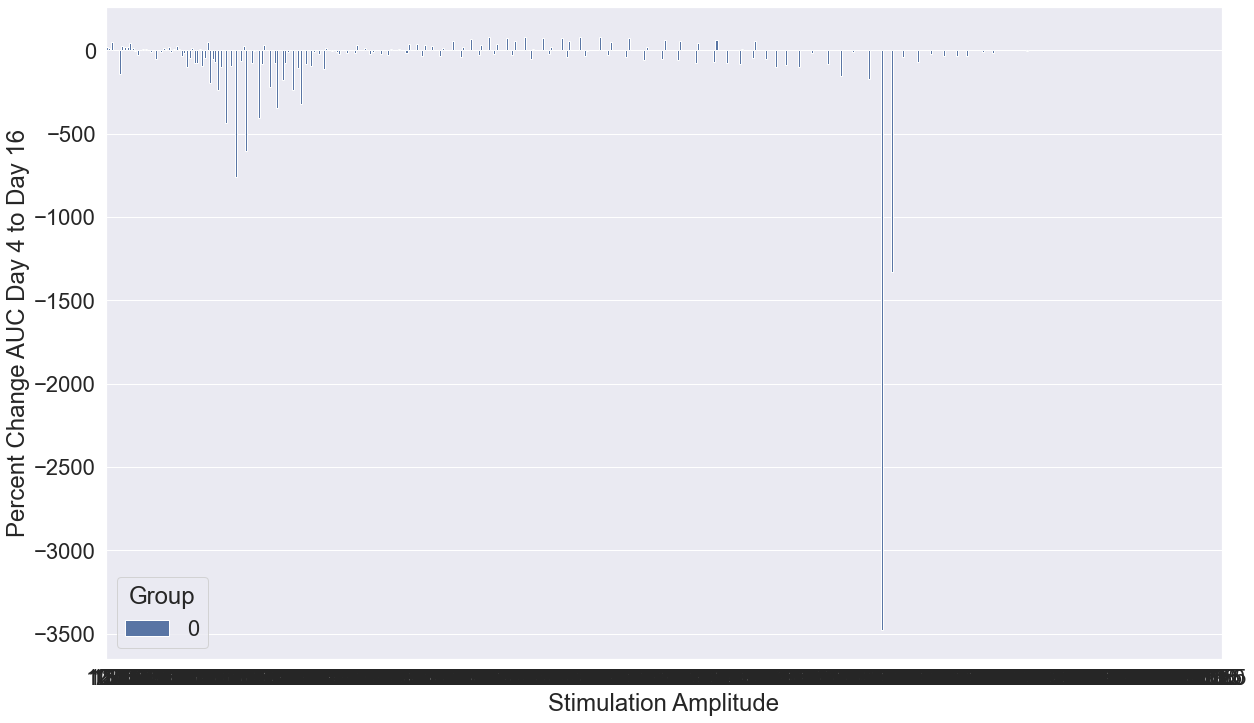

In [437]:
plt.figure(figsize=(20,12))
sns.set(font_scale=2)
sns.barplot(x='Stimulation Amplitude', y='Percent Change AUC Day 4 to Day 16', hue='Group', data=df_erica_plot)



# plt.figure(figsize=(20,12))
# sns.set(font_scale=2)
# sns.set_style("ticks")
# ax = sns.boxplot(x='Group', y='Percent_Change', hue='Stim_Amplitude', data=df_auc_pchange[df_auc_pchange['Days'] == day_range])
# ax.legend(loc="upper left", title='Stimulation Amplitude (uA)', title_fontsize="small")
# ax.set_title(project + ': Percent Change AUC ' + day_range)
# ax.set_ylabel('Percent Change STA AUC')

###### Below is a plot showing the data we will be working with. Data are normalized and are cut off at 13 ms after the stimulus. Also, only stimulation amplitudes divisible by 50 are in this dataframe.

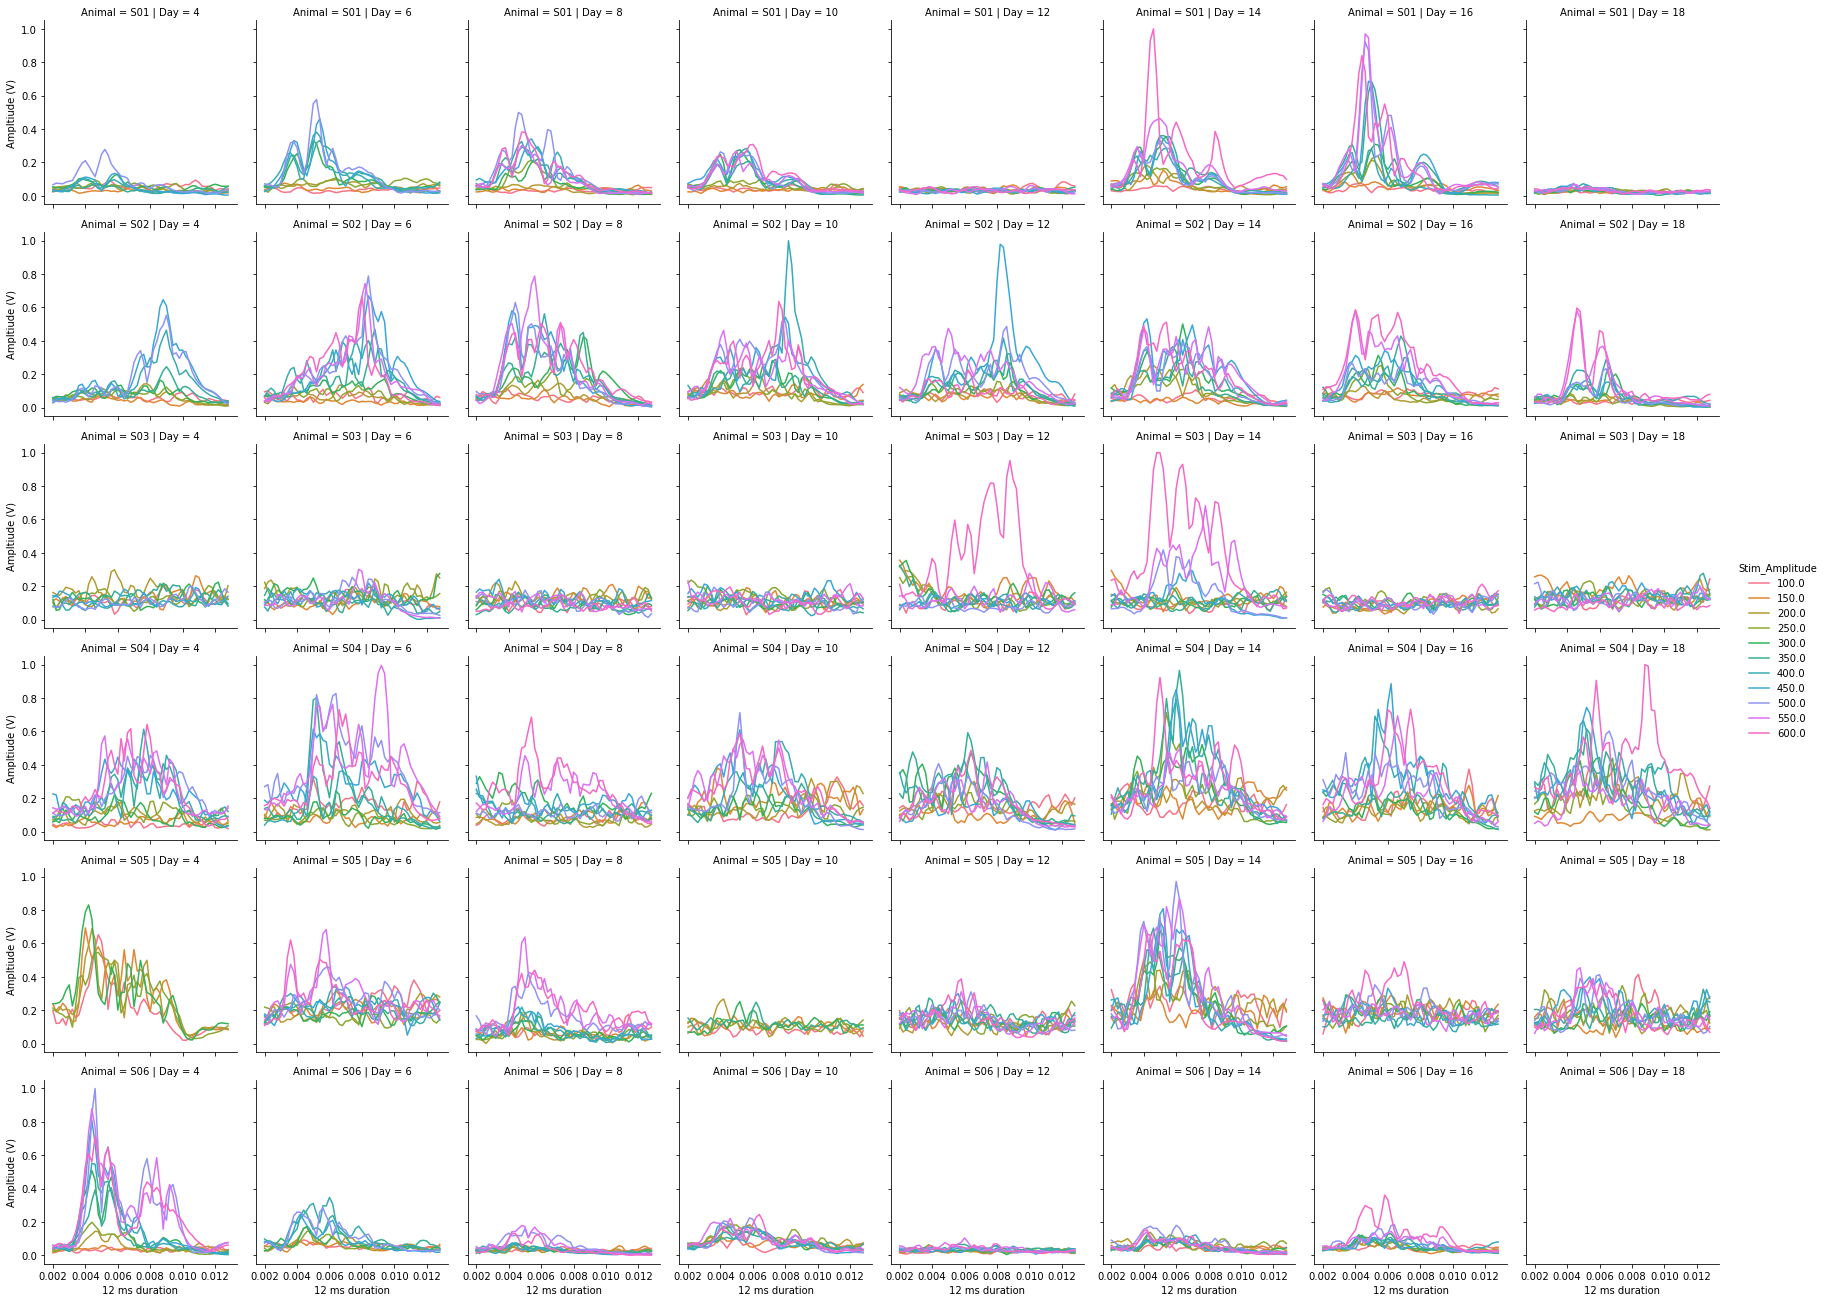

In [14]:
g = sns.FacetGrid(df_bin, col='Day', row='Animal', hue='Stim_Amplitude')
g.map_dataframe(sns.lineplot, x='Time', y='STA_Scaled')
g.set_axis_labels('12 ms duration', 'Ampltiude (V)')
g.add_legend()

We now need to integrate the stimulus triggered average curves to find the area beneath them. We can then compare these areas under the curve (AUCs) between groups, days, stimulus intensities, etc.

The trapezoidal rule provides a simple way to integrate a function but typically has much larger error than Simpson's rule without saving significant compute time. We will use Simpson's rule.

In [182]:
from scipy import integrate

df_auc = df_bin.groupby(['Animal', 'Day', 'Side', 'Stim_Amplitude', 'Bin'])['STA_Scaled'].apply(integrate.simps).reset_index()
df_auc.rename(columns = {'STA_Scaled':'STA_AUC'}, inplace = True)
df_auc = df_auc.dropna()
df_auc.head()

Animal  Day   Side  Stim_Amplitude          Bin   STA_AUC
0    S01    4  Right           100.0    1 to 4 ms  0.419022
1    S01    4  Right           100.0    4 to 7 ms  0.832242
2    S01    4  Right           100.0   7 to 10 ms  0.780677
3    S01    4  Right           100.0  10 to 13 ms  0.807257
5    S01    4  Right           150.0    1 to 4 ms  0.280608

### Rough work below

In [184]:
import numpy as np

# add animal group information to the dataframe
conditions = [
    (df_auc['Animal'] == 'S01') | (df_auc['Animal'] == 'S02'),
    (df_auc['Animal'] == 'S03') | (df_auc['Animal'] == 'S04'),
    (df_auc['Animal'] == 'S05') | (df_auc['Animal'] == 'S06')]
choices = ['Group A', 'Group B', 'Group C']
df_auc['Group'] = np.select(conditions, choices)
df_auc.head()

Animal  Day   Side  Stim_Amplitude          Bin   STA_AUC    Group
0    S01    4  Right           100.0    1 to 4 ms  0.419022  Group A
1    S01    4  Right           100.0    4 to 7 ms  0.832242  Group A
2    S01    4  Right           100.0   7 to 10 ms  0.780677  Group A
3    S01    4  Right           100.0  10 to 13 ms  0.807257  Group A
5    S01    4  Right           150.0    1 to 4 ms  0.280608  Group A

In [298]:
# function to calculate percent change
def perc_change_from_d4(df, day):
    return ((df[str(day)].sub(df['4'])).div(df['4'])).mul(100)

In [203]:
### changed function above to take df arg

df_auc_pchange = df_auc.pivot_table(index=['Animal', 'Side', 'Stim_Amplitude', 'Bin', 'Group'], 
                    columns='Day', 
                    values='STA_AUC').reset_index()

for n in np.arange(6,20,2):
    df_auc_pchange["Day 4 to Day %s" % n] = perc_change_from_d4(n)

df_auc_pchange = df_auc_pchange.drop(df_auc_pchange.columns[5:13], axis=1)
df_auc_pchange.head()

Day Animal   Side  Stim_Amplitude          Bin    Group  Day 4 to Day 6  \
0      S01  Right           100.0    1 to 4 ms  Group A      -27.492595   
1      S01  Right           100.0    4 to 7 ms  Group A      -55.335661   
2      S01  Right           100.0   7 to 10 ms  Group A      -37.073048   
3      S01  Right           100.0  10 to 13 ms  Group A      -37.266530   
4      S01  Right           150.0    1 to 4 ms  Group A      102.909225   

Day  Day 4 to Day 8  Day 4 to Day 10  Day 4 to Day 12  Day 4 to Day 14  \
0        -23.789535        -3.985187       -32.249709       -34.897991   
1        -53.457297       -40.075066       -34.298249       -16.685615   
2        -38.489385       -23.351924       -35.834801       -28.431806   
3        -39.663738       -27.217070         0.151266       -38.419893   
4         -4.090707        -5.039629        29.685401       158.800671   

Day  Day 4 to Day 16  Day 4 to Day 18  
0         -34.450146       -54.934389  
1         -19.420758       -60.140322  
2         -44.579683       -53.460703  
3         -51.832248       -56.675109  
4          65.079660       -41.981925

In [208]:
df_auc_pchange = pd.melt(df_auc_pchange, id_vars=['Animal', 'Side', 'Stim_Amplitude', 'Bin', 'Group'], var_name='Days', value_name='Percent_Change')
df_auc_pchange.head()

Animal   Side  Stim_Amplitude          Bin    Group            Days  \
0    S01  Right           100.0    1 to 4 ms  Group A  Day 4 to Day 6   
1    S01  Right           100.0    4 to 7 ms  Group A  Day 4 to Day 6   
2    S01  Right           100.0   7 to 10 ms  Group A  Day 4 to Day 6   
3    S01  Right           100.0  10 to 13 ms  Group A  Day 4 to Day 6   
4    S01  Right           150.0    1 to 4 ms  Group A  Day 4 to Day 6   

   Percent_Change  
0      -27.492595  
1      -55.335661  
2      -37.073048  
3      -37.266530  
4      102.909225

In [271]:
df_auc_pchange[(df_auc_pchange['Group'] == 'Group C') & (df_auc_pchange['Days'] == 'Day 4 to Day 16') & (df_auc_pchange['Animal'] == 'S05')].head(50)

Animal   Side  Stim_Amplitude          Bin    Group             Days  \
1496    S05  Right           100.0    1 to 4 ms  Group C  Day 4 to Day 16   
1497    S05  Right           100.0    4 to 7 ms  Group C  Day 4 to Day 16   
1498    S05  Right           100.0   7 to 10 ms  Group C  Day 4 to Day 16   
1499    S05  Right           100.0  10 to 13 ms  Group C  Day 4 to Day 16   
1500    S05  Right           150.0    1 to 4 ms  Group C  Day 4 to Day 16   
1501    S05  Right           150.0    4 to 7 ms  Group C  Day 4 to Day 16   
1502    S05  Right           150.0   7 to 10 ms  Group C  Day 4 to Day 16   
1503    S05  Right           150.0  10 to 13 ms  Group C  Day 4 to Day 16   
1504    S05  Right           200.0    1 to 4 ms  Group C  Day 4 to Day 16   
1505    S05  Right           200.0    4 to 7 ms  Group C  Day 4 to Day 16   
1506    S05  Right           200.0   7 to 10 ms  Group C  Day 4 to Day 16   
1507    S05  Right           200.0  10 to 13 ms  Group C  Day 4 to Day 16   
1508    S05  Right           250.0    1 to 4 ms  Group C  Day 4 to Day 16   
1509    S05  Right           250.0    4 to 7 ms  Group C  Day 4 to Day 16   
1510    S05  Right           250.0   7 to 10 ms  Group C  Day 4 to Day 16   
1511    S05  Right           250.0  10 to 13 ms  Group C  Day 4 to Day 16   
1512    S05  Right           300.0    1 to 4 ms  Group C  Day 4 to Day 16   
1513    S05  Right           300.0    4 to 7 ms  Group C  Day 4 to Day 16   
1514    S05  Right           300.0   7 to 10 ms  Group C  Day 4 to Day 16   
1515    S05  Right           300.0  10 to 13 ms  Group C  Day 4 to Day 16   
1516    S05  Right           350.0    1 to 4 ms  Group C  Day 4 to Day 16   
1517    S05  Right           350.0    4 to 7 ms  Group C  Day 4 to Day 16   
1518    S05  Right           350.0   7 to 10 ms  Group C  Day 4 to Day 16   
1519    S05  Right           350.0  10 to 13 ms  Group C  Day 4 to Day 16   
1520    S05  Right           400.0    1 to 4 ms  Group C  Day 4 to Day 16   
1521    S05  Right           400.0    4 to 7 ms  Group C  Day 4 to Day 16   
1522    S05  Right           400.0   7 to 10 ms  Group C  Day 4 to Day 16   
1523    S05  Right           400.0  10 to 13 ms  Group C  Day 4 to Day 16   
1524    S05  Right           450.0    1 to 4 ms  Group C  Day 4 to Day 16   
1525    S05  Right           450.0    4 to 7 ms  Group C  Day 4 to Day 16   
1526    S05  Right           450.0   7 to 10 ms  Group C  Day 4 to Day 16   
1527    S05  Right           450.0  10 to 13 ms  Group C  Day 4 to Day 16   
1528    S05  Right           500.0    1 to 4 ms  Group C  Day 4 to Day 16   
1529    S05  Right           500.0    4 to 7 ms  Group C  Day 4 to Day 16   
1530    S05  Right           500.0   7 to 10 ms  Group C  Day 4 to Day 16   
1531    S05  Right           500.0  10 to 13 ms  Group C  Day 4 to Day 16   
1532    S05  Right           550.0    1 to 4 ms  Group C  Day 4 to Day 16   
1533    S05  Right           550.0    4 to 7 ms  Group C  Day 4 to Day 16   
1534    S05  Right           550.0   7 to 10 ms  Group C  Day 4 to Day 16   
1535    S05  Right           550.0  10 to 13 ms  Group C  Day 4 to Day 16   
1536    S05  Right           600.0    1 to 4 ms  Group C  Day 4 to Day 16   
1537    S05  Right           600.0    4 to 7 ms  Group C  Day 4 to Day 16   
1538    S05  Right           600.0   7 to 10 ms  Group C  Day 4 to Day 16   
1539    S05  Right           600.0  10 to 13 ms  Group C  Day 4 to Day 16   

      Percent_Change  
1496       18.455456  
1497      -56.779948  
1498       24.986994  
1499      173.498386  
1500      -18.284108  
1501      -51.692749  
1502      -41.891742  
1503      141.762349  
1504      -15.642828  
1505      -50.780332  
1506      -30.221379  
1507       93.740234  
1508      -34.602463  
1509      -50.854253  
1510      -38.874611  
1511      200.945555  
1512      -35.388246  
1513      -53.418044  
1514      -30.850324  
1515      122.913861  
1516             NaN  
1517             NaN  
1518      

C:\Users\Ian\anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\Ian\anaconda3\lib\site-packages\seaborn\axisgrid.py:650: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


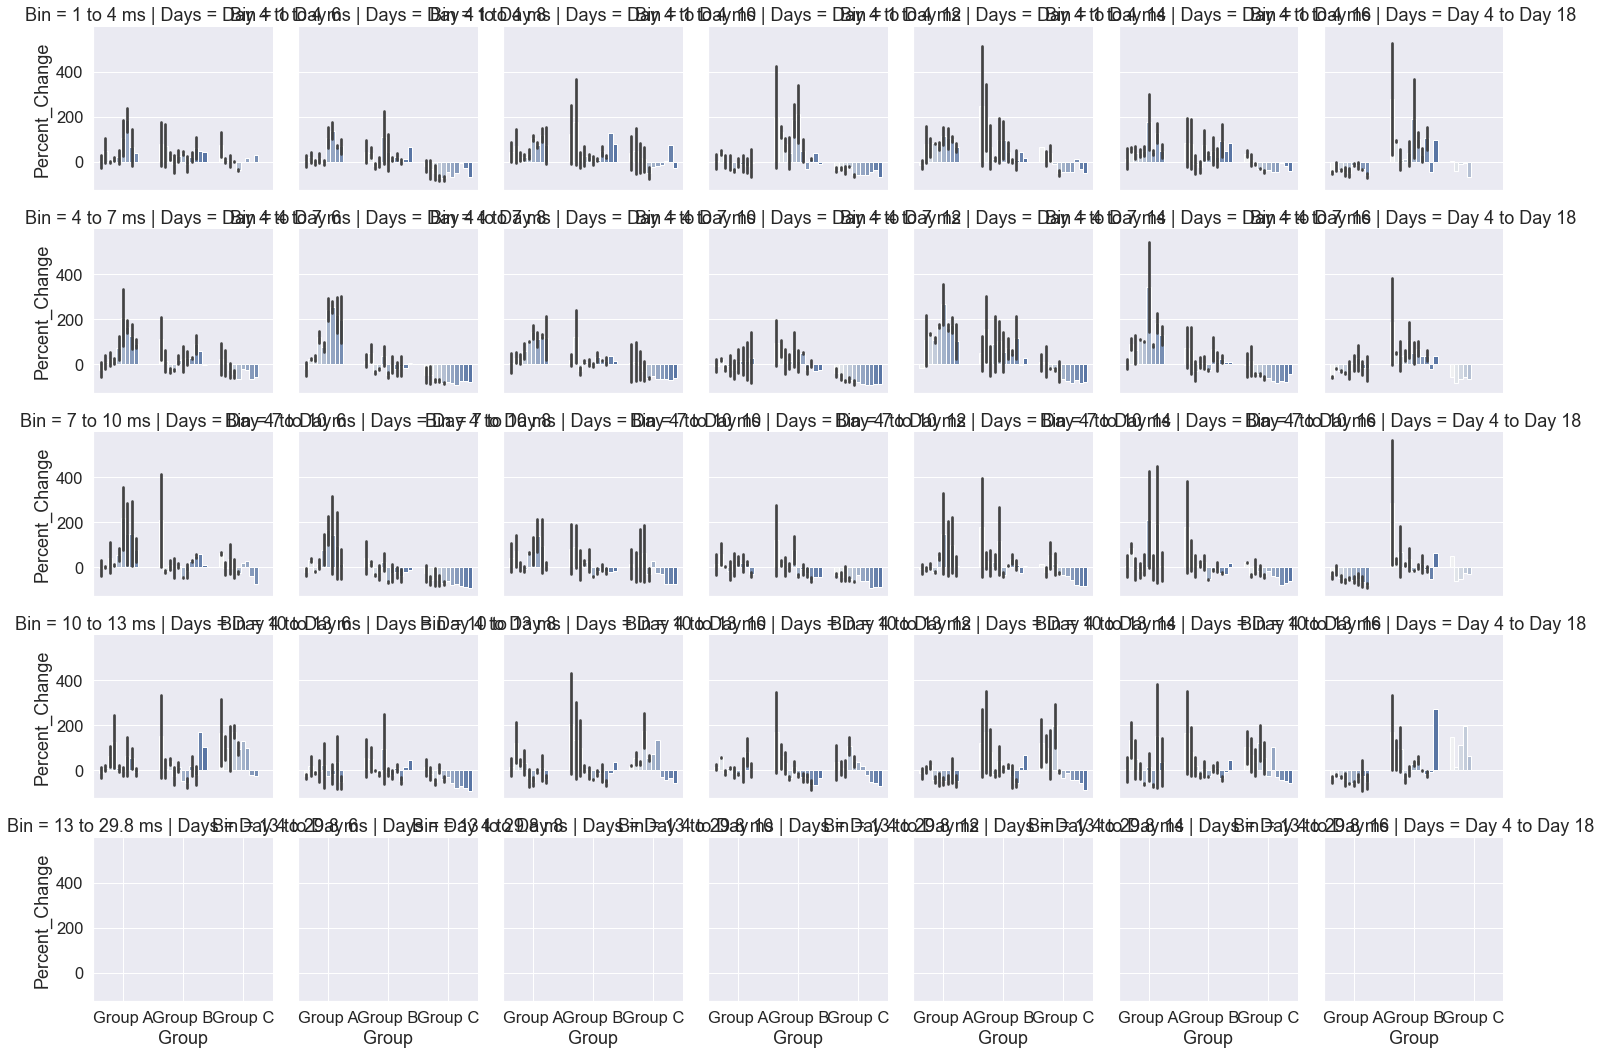

In [261]:
# all the bar plots
sns.set(font_scale=1.5)
g = sns.FacetGrid(df_auc_pchange, col="Days", row='Bin')
g.map(sns.barplot, "Group", "Percent_Change", 'Stim_Amplitude')

Text(0, 0.5, 'Percent Change STA AUC')

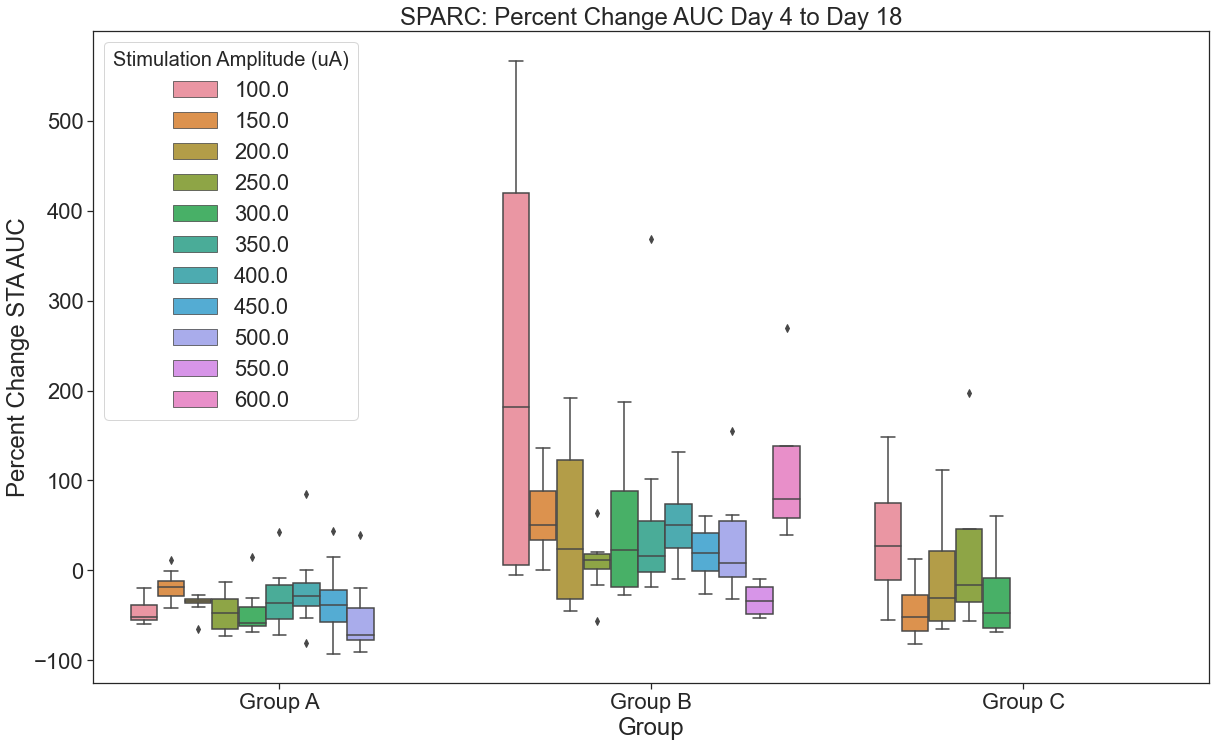

In [258]:
day_range = 'Day 4 to Day 18'

plt.figure(figsize=(20,12))
sns.set(font_scale=2)
sns.set_style("ticks")
ax = sns.boxplot(x='Group', y='Percent_Change', hue='Stim_Amplitude', data=df_auc_pchange[df_auc_pchange['Days'] == day_range])
ax.legend(loc="upper left", title='Stimulation Amplitude (uA)', title_fontsize="small")
ax.set_title(project + ': Percent Change AUC ' + day_range)
ax.set_ylabel('Percent Change STA AUC')

### Other analyses

- Peak to peak from stimulus triggered average for each current amplitude, each animal, each day
- Latency from stimulus pulse to stimulus triggered average for each current amplitude, each animal, each day
- Time domains of stimulus triggered average
- Differences in any of these parameters based on time of day?
- How are we going to present the impedance data in the Neilsen paper? I’m still not clear on this.
- Additional things we can look at (e.g., wavelet, FFT, HMM, etc.)
- Look in manuscript file for notes on ideas. Also look in Daily Notes on OneNote for papers that did EMG analysis well.
- Add information on time of day and stimulus amplitude from Neurochip